In [ ]:
#Netflix prize dataset
#importing the necessary libraries for importing the dataset in jupyter notebook
#Around 100 m+ ratings 4499 movies 480,000 users

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Resading dataset file
netflix_dataset=pd.read_csv('/content/drive/MyDrive/Copy of combined_data_1.txt.zip',header=None,names =['Cust_Id','Rating'],usecols=[0,1])

In [ ]:
netflix_dataset.head()

Cust_Id  Rating
0       1:     NaN
1  1488844     3.0
2   822109     5.0
3   885013     4.0
4    30878     4.0

In [ ]:
netflix_dataset.shape

(24058263, 2)

In [ ]:
netflix_dataset.tail()

Cust_Id  Rating
24058258  2591364     2.0
24058259  1791000     2.0
24058260   512536     5.0
24058261   988963     3.0
24058262  1704416     3.0

In [ ]:
#get the customer count with Nan values
movie_count=netflix_dataset.isnull().sum()
movie_count=movie_count['Rating']

In [ ]:
movie_count

4499

In [ ]:
#to calculate how many customers we are having in the dataset
customer_count=netflix_dataset['Cust_Id'].nunique()

In [ ]:
customer_count

475257

In [ ]:
#without NaN values
customer_count=customer_count-movie_count

In [ ]:
customer_count

470758

In [ ]:
#get the total number of ratings given by the customers
rating_count=netflix_dataset['Cust_Id'].count()-movie_count

In [ ]:
rating_count

24053764

In [ ]:
#netflix_dataset['Rating'].count()

In [ ]:
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings to the movies
stars=netflix_dataset.groupby('Rating')['Rating'].agg(['count'])

In [ ]:
stars

count
Rating         
1.0     1118186
2.0     2439073
3.0     6904181
4.0     8085741
5.0     5506583

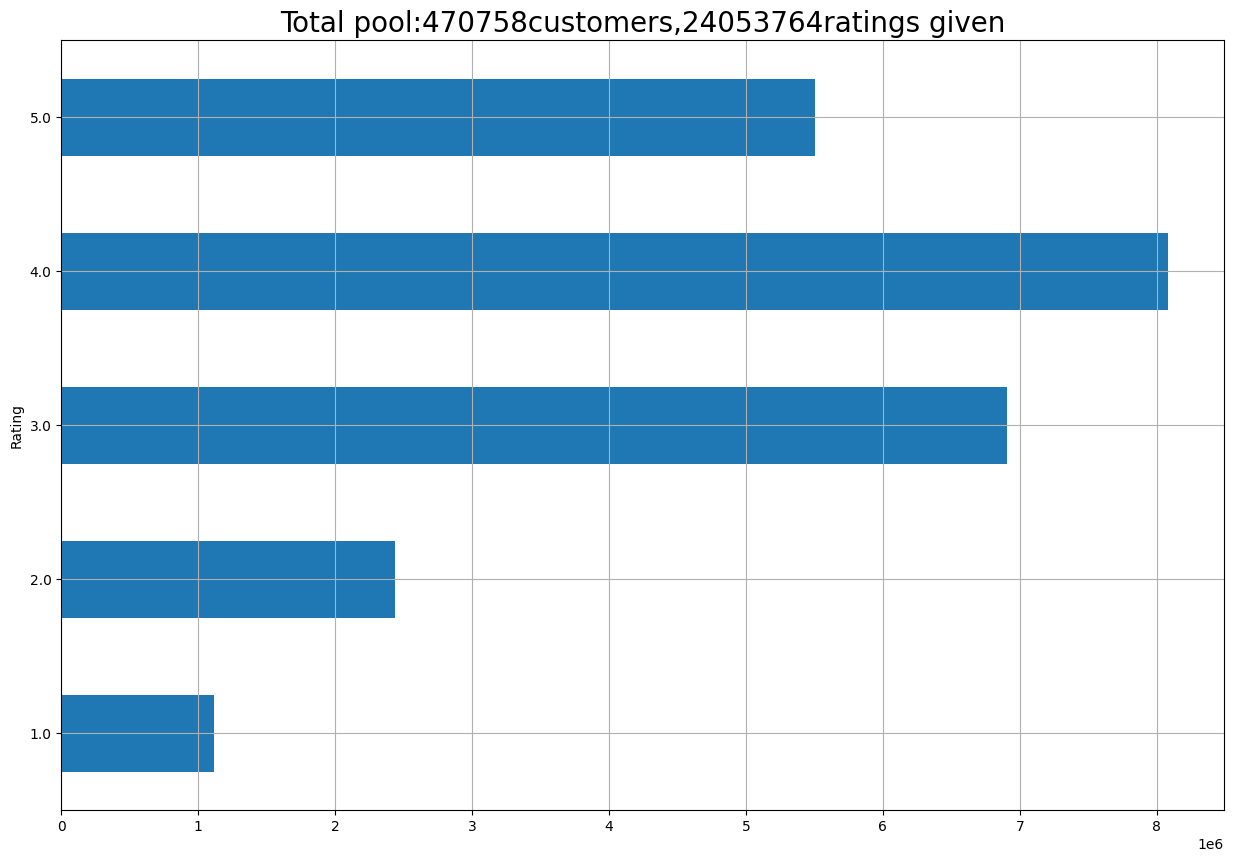

In [ ]:
#Stars
ax=stars.plot(kind='barh',legend=False,figsize=(15,10))
plt.title(f'Total pool:{customer_count}customers,{rating_count}ratings given',fontsize=20)
plt.grid(True)


In [ ]:
#add another column that will have movie id
#first of all we will be calculating how many null values we are having in the ratings column
df_nan=pd.DataFrame(pd.isnull(netflix_dataset.Rating))


In [ ]:
df_nan

Rating
0           True
1          False
2          False
3          False
4          False
...          ...
24058258   False
24058259   False
24058260   False
24058261   False
24058262   False

[24058263 rows x 1 columns]

In [ ]:
df_nan=df_nan[df_nan['Rating']==True]

In [ ]:
df_nan

Rating
0           True
548         True
694         True
2707        True
2850        True
...          ...
24046714    True
24047329    True
24056849    True
24057564    True
24057834    True

[4499 rows x 1 columns]

In [ ]:
df_nan = df_nan.reset_index()

In [ ]:
df_nan.head()

index  Rating
0      0    True
1    548    True
2    694    True
3   2707    True
4   2850    True

In [ ]:
#now we will create a numpy that will contain 1 from values 0 to 547, 2 from 549 to 693 and so on
movie_np=[]
movie_id=1
for i, j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
     temp=np.full((1, i-j-1), movie_id)
     movie_np=np.append(movie_np, temp)
     movie_id+=1

#account for last record and corresponding length
#numpy approach
last_record=np.full((1, len(netflix_dataset)-df_nan.iloc[-1,0]-1),movie_id)#movie_id will be 4499
movie_np=np.append(movie_np, last_record)

In [ ]:
i-j-1

269

In [ ]:
#len(netflix_dataset)

In [ ]:
#df_nan.iloc[-1,0] #last row, first column

In [ ]:
24053764-240578334

-216524570

In [ ]:
#24053764-24057834-1

In [ ]:
#netflix_dataset

In [ ]:
df_nan['index'][1:]

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [ ]:
df_nan['index'][:-1]

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [42]:
# temp=np.full((1,547),1) #(shape, fill_values)

In [43]:
# print(temp)

In [44]:
movie_np[-20:-1]

array([4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499.,
       4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499.,
       4499.])

In [ ]:
netflix_dataset = netflix_dataset[pd.notnull(netflix_dataset['Rating'])]
netflix_dataset['movie_Id']=movie_np.astype(int)
#netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id].astype(int)
print("now the dataset will look like:")
netflix_dataset.head()


now the dataset will look like:


Cust_Id  Rating  movie_Id
1  1488844     3.0         1
2   822109     5.0         1
3   885013     4.0         1
4    30878     4.0         1
5   823519     3.0         1

In [ ]:
netflix_dataset.tail()

Cust_Id  Rating  movie_Id
24058258  2591364     2.0      4499
24058259  1791000     2.0      4499
24058260   512536     5.0      4499
24058261   988963     3.0      4499
24058262  1704416     3.0      4499

In [ ]:
#now we will remove all the users that have rated less movies and
#also all the those movies that has been rated less in numbers
#f=['count','mean']

In [ ]:
#dataset_movie_summary=netflix_dataset.groupby('movie_id').agg(f)

In [45]:
#dataset_movie_summary


In [48]:
dataset_movie_summary=netflix_dataset.groupby('movie_Id')['Rating'].agg(["count"])

In [49]:
dataset_movie_summary

count
movie_Id       
1           547
2           145
3          2012
4           142
5          1140
...         ...
4495        614
4496       9519
4497        714
4498        269
4499        428

[4499 rows x 1 columns]

In [50]:
dataset_movie_summary["count"].quantile(0.7)

1798.6

In [51]:
#now we will create a benchmark
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.7),0)
movie_benchmark

1799.0

In [52]:
dataset_movie_summary['count']

movie_Id
1        547
2        145
3       2012
4        142
5       1140
        ... 
4495     614
4496    9519
4497     714
4498     269
4499     428
Name: count, Length: 4499, dtype: int64

In [55]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list
#considering only the index of those movies whose ratings are less then the benchmark

Int64Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
            ...
            4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='movie_Id', length=3149)

In [57]:
#we will remove all the customers and movies that are below the benchmark
print('the original dataframe has:', netflix_dataset.shape,'shape')

the original dataframe has: (24053764, 3) shape


In [60]:
netflix_dataset.head()

Cust_Id  Rating  movie_Id
695  1025579     4.0         3
696   712664     5.0         3
697  1331154     4.0         3
698  2632461     3.0         3
699    44937     5.0         3

In [61]:
import pandas as pd

In [73]:
df_title=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of movie_titles.csv', encoding='ISO-8859-1', header=None, usecols=[0,1])


In [68]:
df_title.head(10)

0       1
0   1  2003.0
1   2  2004.0
2   3  1997.0
3   4  1994.0
4   5  2004.0
5   6  1997.0
6   7  1992.0
7   8  2004.0
8   9  1991.0
9  10  2001.0

In [1]:
!pip install scikit-surprise

  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163773 sha256=431d071c214cd12bcab35658129b6c26a25e76a159ff4860b36c2c386d328cde
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
# modelling building

import math
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [3]:
# !pip install scikit-surprise

In [4]:
# help us to read the dataset for svd algo
reader = Reader()

NameError: ignored